## Importing necessary packages
In this section we are importing and installing necessary packages will be using during our excercises.

In [1]:
install.packages("mice")
library(mice)
install.packages("zoo")
library("zoo")
install.packages("classInt")
library(classInt)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘ucminf’, ‘numDeriv’, ‘lme4’, ‘ordinal’, ‘pan’, ‘jomo’, ‘mitml’

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



## Creating Dataset
We are creating our own dataset which will contain some missing values and outliers along with 3 features. Creating dataset
by using "R" is easy. 

In [5]:
# creating dataframe
dataset <- data.frame("Qualification" = c('bachelor','bachelor', 'Masters', 'Masters', 'Masters', 'PHD', 'PHD','bachelor','Masters', 'PHD', 'PHD','bachelor', 'PHD','bachelor','Masters', 'PHD','PHD','bachelor','Masters', 'PHD'),
                   "Salary" = c(5000, 100000, NA, 7000, 6500, NA, 10000, 9000, 3000, 7000, 12000, 4000, NA, 9090, 9500, 3000, 5000, 7000, 9000, 3000),
                    "Expenses" = c(2000, 6000, 3000, 5000, 4000, 7400, 76000, NA, 2000, 6600, 11000, 1200, 7600, 3000, 2400, 6200,70000, NA, 2500, 7600))

In [6]:
# displaying some of our data
head(dataset)

Qualification,Salary,Expenses
<fct>,<dbl>,<dbl>
bachelor,5000,2000
bachelor,100000,6000
Masters,NA,3000
Masters,7000,5000
Masters,6500,4000
PHD,NA,7400


## Missing Value
Missing value is painful for analysis. Firstly we will check for missing value in our dataset and then we will fill those 
    data point with mean. As our dataset is small and don't want to lose any of our observation. There are many ways to determine missing values in 'R'. One elegent way is to use 'mice' library's method called pattern which will give us visual representation of missing values. Another simple method is to use 'R' base method called 'is.na' which is pretty handy as well. Both approach has shown below. 
    From our exploration is clear that we 5 missing observations. We would like to fill those values with it's column mean. One handy approach is it use 'zoo' library's aggregate library. It is obvious that missing values are reside in
    "Expenses" and "Salary" columns. So just need to compute mean only two of these columns. 

,Qualification,Expenses,Salary,
15,1,1,1,0
3,1,1,0,1
2,1,0,1,1
,0,2,3,5


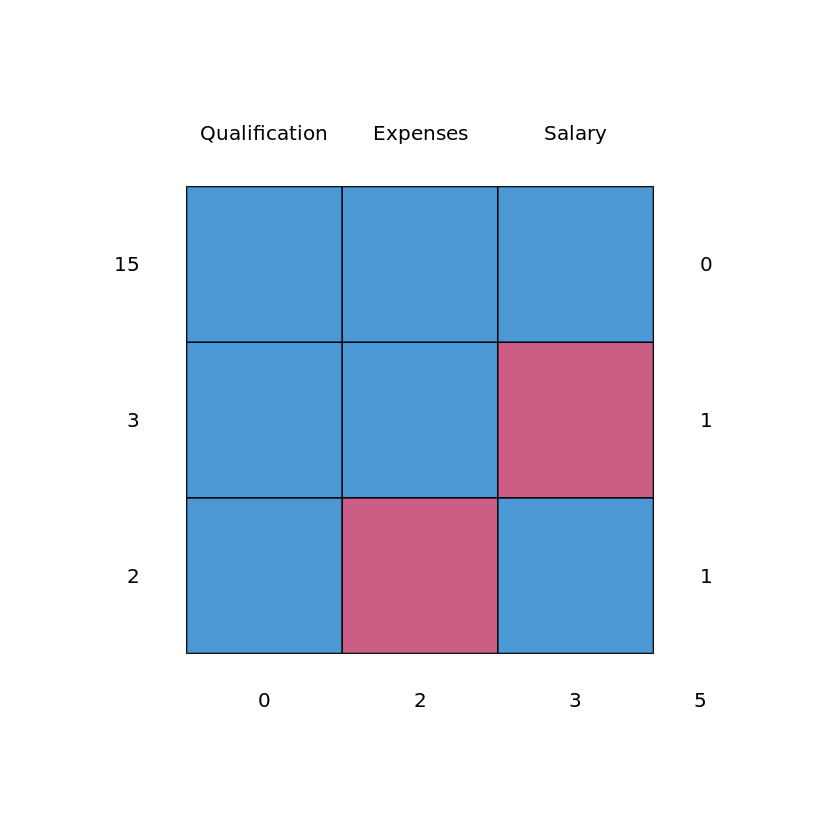

In [7]:
md.pattern(dataset)

In [9]:
# total no of missing values
sum(is.na(dataset))

[1] 5

In [10]:
# filling missing values
data <- na.aggregate(dataset[2:3])

In [11]:
# looking into some our data without missing values
head(data)

Salary,Expenses
<dbl>,<dbl>
5000.00,2000
100000.00,6000
12299.41,3000
7000.00,5000
6500.00,4000
12299.41,7400


## Outlier Detection
R programming has sophisticated packages for detecting outliers in dataset. One of the handy approach is to draw boxplot and see which data point is considered outlier. First we draw the boxplot and then we extract the values that falls under outlier. From our experiment with 'R' code, we find out that we have total 3 observations which falls under outlier these values are: 100000, 70000, 76000. Outlier can be removed or replaced.

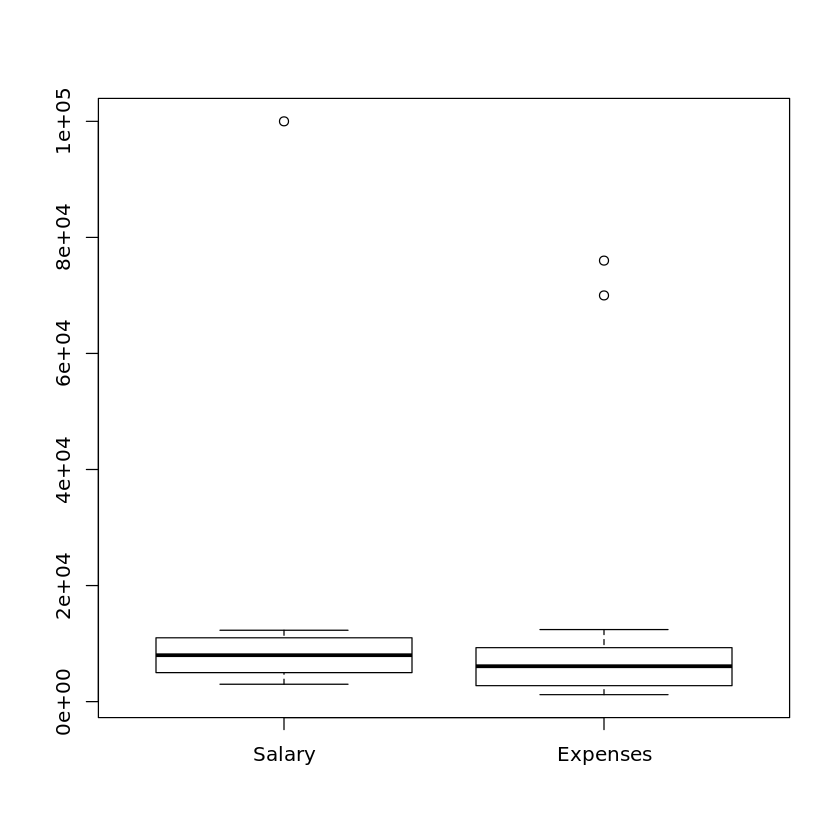

In [12]:
# drawing boxplot
boxplot(data)

In [13]:
# extracting values
boxplot(data, plot = FALSE)$out

[1] 100000  76000  70000

# Standarazition
It also known as data normalization. It helps us to build more accurate predictive model and it also reduce computational cost at times. "R" programming has very clean method for data normalization. One of the method is not use 'scale'. Which will normalize data by it's mean or z-score

In [14]:
std_data <- scale(data)

In [15]:
head(std_data)

Salary,Expenses
-0.3494636,-0.4956886
4.1987170,-0.3053442
0.0000000,-0.4481025
-0.2537124,-0.3529303
-0.2776502,-0.4005164
0.0000000,-0.2387236


## Variable Selection
Pearson corelatoin is quite handy to determine which variable or feature to select. The 'p' value will tells are how strongly one variable is corelated with another. In 'R' programming the method called 'cor.test' compute pearson corelation and gives us desired data point insight.

In [16]:
# pearson co relation
cor.test(data$Salary, data$Expenses)


	Pearson's product-moment correlation

data:  data$Salary and data$Expenses
t = -0.28057, df = 18, p-value = 0.7822
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4940808  0.3878590
sample estimates:
        cor 
-0.06598757 


# Categorization
There are few ways to categorize data. One approach is to use equal frequency binning. "R" library called 'classInt' comes
into handy for that purpose. Below we have shown Salay feature's equal binning method.

In [24]:
cat_data <- classIntervals(data$Salary, 5, style = 'equal')

In [25]:
cat_data

style: equal
  one of 330 possible partitions of this variable into 5 classes
 [3000,22400) [22400,41800) [41800,61200) [61200,80600) [80600,1e+05] 
           19             0             0             0             1 

## References
- https://www.rdocumentation.org
- https://cran.r-project.org/web/packages/